**Impoting libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load the dataset using pandas.**

In [ ]:
df=pd.read_csv('heart-disease.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Handle any missing values appropriately**

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Calculating the average age of patients with heart disease**

In [26]:
average_age_of_patients_with_hert_disease=df[df['target']==1]['age'].mean()
print('average_age_of_patients_with_hert_disease=',average_age_of_patients_with_hert_disease)

average_age_of_patients_with_hert_disease= 52.4969696969697


**Calculating the average age of patients without heart disease**

In [27]:
average_age_of_patients_without_hert_disease=df[df['target']==0]['age'].mean()
print('average_age_of_patients_without_hert_disease=',average_age_of_patients_without_hert_disease)

average_age_of_patients_without_hert_disease= 56.60144927536232


**Determining the distribution of chest pain types among patients**

In [34]:
chest_pain_distribution = df['cp'].value_counts()
print(chest_pain_distribution)

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64


**Finding the correlation between thalach(maximum heart rate) and age**

In [40]:
correlation = df['thalach'].corr(df['age'])
print("Correlation between thalach and age:", correlation)

Correlation between thalach and age: -0.39852193812106734


**Analyzing the effect of sex on the presence of heart disease**

In [41]:
# Calculate the mean presence of heart disease for each sex
heart_disease_by_sex = df.groupby('sex')['target'].mean()

print("Mean presence of heart disease by sex:")
print(heart_disease_by_sex)

# Calculate the count of heart disease presence for each sex
heart_disease_count_by_sex = df.groupby('sex')['target'].value_counts().unstack()

print("Count of heart disease presence by sex:")
print(heart_disease_count_by_sex)


Mean presence of heart disease by sex:
sex
0    0.750000
1    0.449275
Name: target, dtype: float64
Count of heart disease presence by sex:
target    0   1
sex            
0        24  72
1       114  93


**Plotting a histogram of the age distribution of patients**

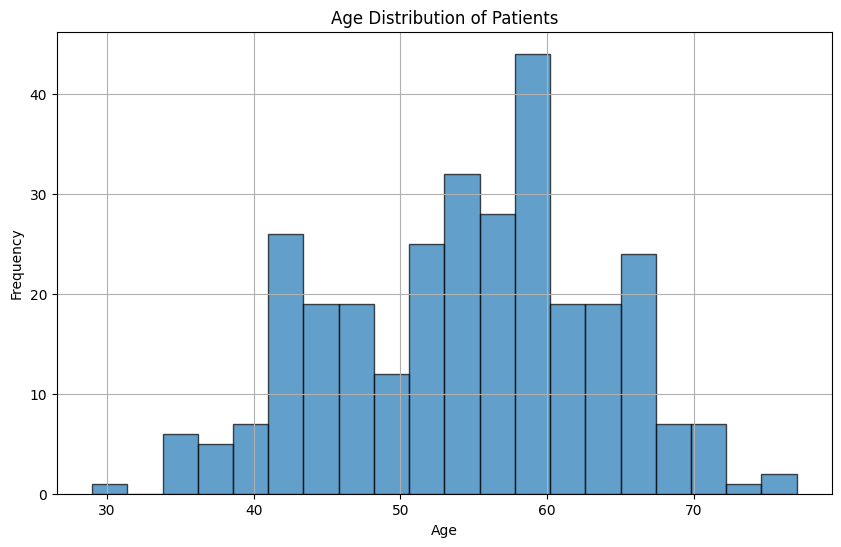

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Patients')
plt.grid(True)
plt.show()

**Creating a bar chart showing the distribution of chest pain types among patients**

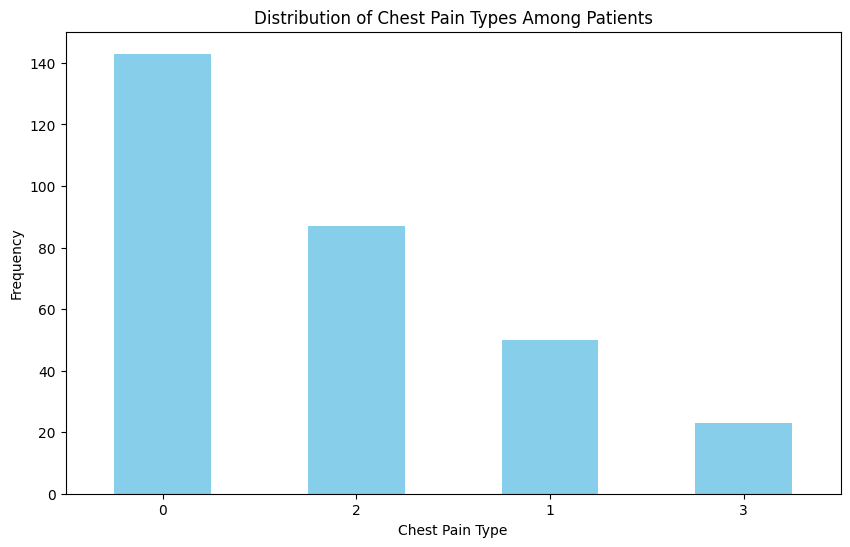

In [43]:
plt.figure(figsize=(10, 6))
chest_pain_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.title('Distribution of Chest Pain Types Among Patients')
plt.xticks(rotation=0)
plt.show()

**Plotting a scatter plot to show the relationship between thalach(maximum heart rate) and age**

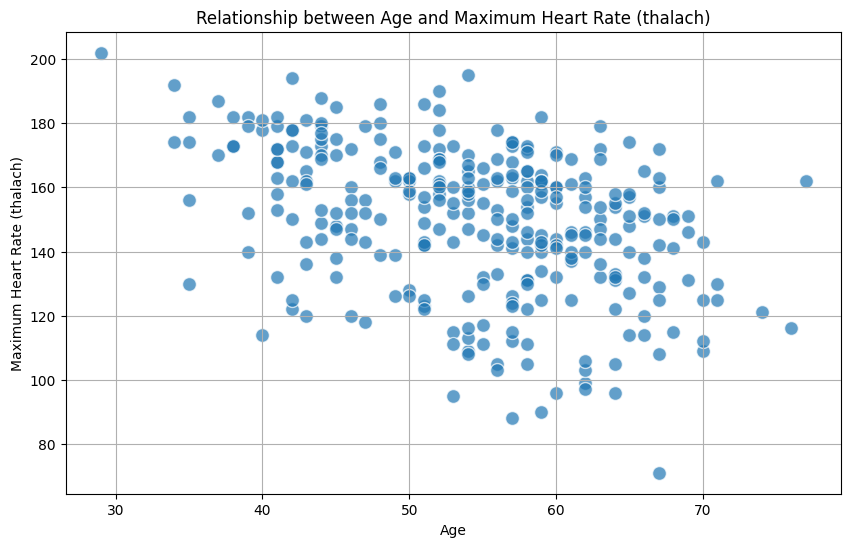

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['thalach'], alpha=0.7, edgecolors='w', s=100)
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.title('Relationship between Age and Maximum Heart Rate (thalach)')
plt.grid(True)
plt.show()

**Creating a box plot to compare the age distribution of patients with and without heart disease**

<Figure size 1000x600 with 0 Axes>

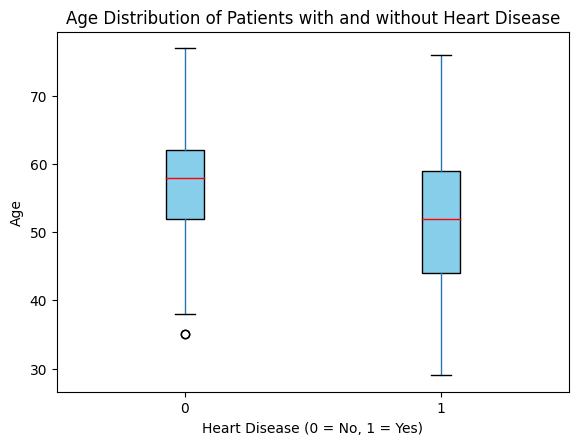

In [45]:
plt.figure(figsize=(10, 6))
df.boxplot(column='age', by='target', grid=False, patch_artist=True,
           boxprops=dict(facecolor='skyblue'),
           medianprops=dict(color='red'))

plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.title('Age Distribution of Patients with and without Heart Disease')
plt.suptitle('')  # Remove the default subtitle
plt.show()

**Calculating the correlation matrixfor all numerical features in the dataset**

In [46]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.06

**Performing a rolling mean analysis on the chol(cholestrol) levels with a window size of 5 and plotting it**

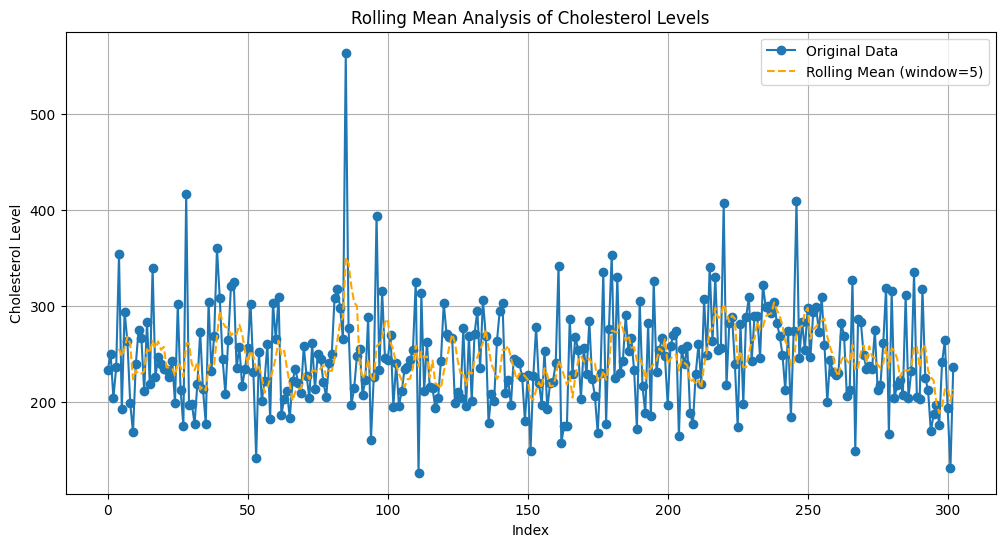

In [47]:
rolling_mean_chol = df['chol'].rolling(window=5).mean()

# Plot the original data and the rolling mean
plt.figure(figsize=(12, 6))
plt.plot(df['chol'], label='Original Data', marker='o')
plt.plot(rolling_mean_chol, label='Rolling Mean (window=5)', color='orange', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Cholesterol Level')
plt.title('Rolling Mean Analysis of Cholesterol Levels')
plt.legend()
plt.grid(True)
plt.show()